<a href="https://colab.research.google.com/github/CoolCityCat/5thGradeDataset/blob/main/220821_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(%EC%B9%98%EC%A6%88%EB%83%A5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[프로젝트 초안 작성하기]

> ### 5학년 1학기 사회 인구분포 수업자료 만들기 

*   프로젝트 주제 : 인구 데이터 활용하여 한 차시 분량의 수업 준비하기
*   **선정 차시 : 5-1 사회  '우리나라의 인구 분포'**
*   주제 선정 이유 :
##### 1) 교과서에서 제공하는 인구 데이터(2015년)가 아닌 최신 데이터 활용
##### 2) 학생들이 직접 다양한 지역의 인구분포를 탐구하도록 하여 학습 내용에 대한 흥미와 참여도 높이기
##### 3) 정말 파이썬을 수업에 활용하여 학습 목표에 도달할 수 있을지 궁금해서...!


In [2]:
!git clone https://github.com/CoolCityCat/5thGradeDataset

Cloning into '5thGradeDataset'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 19 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [3]:
cd 5thGradeDataset

/content/5thGradeDataset


In [4]:
ls

age_gender2011.csv  age_gender2022.csv


In [9]:
# 한글폰트 설치

!apt-get install fonts-nanum -qq > /dev/null
!fc-cache -fv
import matplotlib as mpl
mpl.font_manager._rebuild()
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

import matplotlib.pyplot as plt
plt. rc('font', family = 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


🔎인구분포를 알고 싶은 지역의 이름을 입력해주세요.
행정구역의 이름은 특별시, 특별자치시, 광역시, 도, 특별자치도, 시, 군, 구, 읍, 면, 동 중 하나를 골라 정확히 입력해주세요.
예시) 서초구, 세종특별자치시, 상도제1동, 애월읍 등
------------------------------------
어느 지역의 인구분포를 나타낼까요? : 가경동
------------------------------------
🤸📈가경동의 인구분포를 열심히 찾아보고 있습니다...📉🤸‍♂️
------------------------------------
💡가경동의 총 인구 수는 55727명 입니다.
------------------------------------
여성 인구 : 28525명
남성 인구 : 27202명
여성 인구가 남성 인구보다 1323명 더 많습니다.
------------------------------------
유소년층 인구 : 7951명(약 14.3%)
청장년층 인구 : 41776명(약 75.0%)
노년층 인구 : 6000명(약 10.8%)
------------------------------------


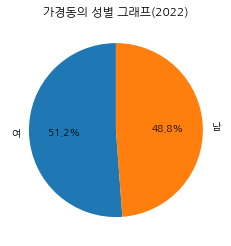

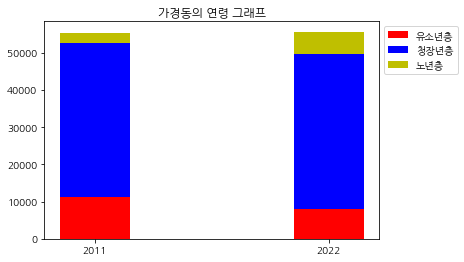

In [66]:
import time
import csv
new_data = csv.reader(open('age_gender2022.csv'))
old_data = csv.reader(open('age_gender2011.csv'))

print('🔎인구분포를 알고 싶은 지역의 이름을 입력해주세요.') 
print('행정구역의 이름은 특별시, 특별자치시, 광역시, 도, 특별자치도, 시, 군, 구, 읍, 면, 동 중 하나를 골라 정확히 입력해주세요.')
print('예시) 서초구, 세종특별자치시, 상도제1동, 애월읍 등')
time.sleep(2)
print('------------------------------------')
time.sleep(1)
grf_region = input('어느 지역의 인구분포를 나타낼까요? : ')
print('------------------------------------')
time.sleep(1)
print('🤸📈' + grf_region + '의 인구분포를 열심히 찾아보고 있습니다...📉🤸‍♂️')
time.sleep(1)
print('------------------------------------')
time.sleep(1)
for row in new_data : 
    if grf_region in row[0] :
        print('💡' + grf_region + '의 총 인구 수는 ' + str(int(row[1])+int(row[104])) + '명 입니다.')
        print('------------------------------------')
        print('여성 인구 : ' + row[104] + '명')
        print('남성 인구 : ' + row[1] + '명')
        if int(row[104]) > int(row[1]) :
            print('여성 인구가 남성 인구보다 ' + str(int(row[104]) - int(row[1])) + '명 더 많습니다.')
        elif int(row[104]) < int(row[1]) :
            print('남성 인구가 여성 인구보다 ' + str(int(row[1]) - int(row[104])) + '명 더 많습니다.')
        elif int(row[104]) == int(row[1]) :
            print('남성 인구와 여성 인구의 수가 같습니다.')
        gender = [int(row[104]),int(row[1])]
        print('------------------------------------')
        age1 = [0,0,0]
        for i in range(3, 18) :
            age1[0] = age1[0] + int(row[i]) + int(row[i+103])
        for i in range(18, 68) :
            age1[1] = age1[1] + int(row[i]) + int(row[i+103])
        for i in range(68, 104) :
            age1[2] = age1[2] + int(row[i]) + int(row[i+103])
        label = ['유소년층 인구','청장년층 인구','노년층 인구']
        for i in range(3) :
            print(label[i] + ' : ' + str(age1[i]) + '명(약 ' + str(round((100*age1[i])/(int(row[1])+int(row[104])), 1)) + '%)')
        break

for row in old_data :
    if grf_region in row[0] :
        age2 = [0,0,0]
        for i in range(3, 18) :
            age2[0] = age2[0] + int(row[i]) + int(row[i+103])
        for i in range(18, 68) :
            age2[1] = age2[1] + int(row[i]) + int(row[i+103])
        for i in range(68, 104) :
            age2[2] = age2[2] + int(row[i]) + int(row[i+103])
        break
print('------------------------------------')

import matplotlib.pyplot as plt
plt.rc('font', family = 'NanumGothic')
plt.title(grf_region + '의 성별 그래프(2022)')
label = ['여','남']
plt.pie(gender, labels = label, autopct = '%.1f%%', startangle = 90)
plt.show()

plt.title(grf_region + '의 연령 그래프')
year = ['2011', '2022']
youth = [age2[0],age1[0]]
adult = [age2[1],age1[1]]
youth_adult = [int(age2[0])+int(age2[1]), int(age1[0])+int(age1[1])]
elder = [age2[2],age1[2]]
w = 0.3
plt.bar(year, youth, w, color = 'r')
plt.bar(year, adult, w, bottom = youth, color = 'b')
plt.bar(year, elder, w, bottom = youth_adult, color = 'y')
plt.legend(['유소년층','청장년층','노년층'], bbox_to_anchor = (1,1))
plt.show()